# Classification Phase #1 -  EfficientNet ( Method 1 )

### CTCB (Classification of Toxigenic CyanoBacterial genera) project

* **Author : Mudassir Azhar**
* **Paper Link : **

---------------

#### Import the necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import collections
from random import choices
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.callbacks import *
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# convert to one-hot-encoding
# Correct import for to_categorical
from tensorflow.keras.utils import to_categorical

# Other imports
from tensorflow.keras.utils import plot_model




# Transfer learning model
from tensorflow.keras.applications import *

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-09-02 06:24:42.881417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 06:24:42.881531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 06:24:43.013186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


---------------

### Fine Tuning

#### Preparing Training and Test sets

Loading Train set:

In [3]:
Categories = list(os.listdir("/kaggle/input/new-class-added-data2/new_data-13-8-24/Train"))
Categories

['Phormidium',
 'Cylindrospermopsis',
 'Anabaena',
 'Rivularia',
 'Raphidiopsis',
 'Nostoc',
 'Synechococcus',
 'Oscillatoria',
 'Dolichospermum',
 'Planktothrix',
 'Aphanizomenon',
 'Microcystis',
 'Chroococcales']

Creating dictionary from images of the training set:

In [4]:
images = {} # A dictionary with 10 keys includes the class names and each value is a list of images
images_directory = {} # like images, just save image address instead of image
for dirname in os.listdir("/kaggle/input/new-class-added-data2/new_data-13-8-24/Train/"):
    dir = "/kaggle/input/new-class-added-data2/new_data-13-8-24/Train/"+dirname
    if os.path.isdir(dir):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(dir)):
          if 'jpg' in filename or 'png' in filename:
              addr = dir+"/"+filename
              image = cv2.imread(addr,0)
              image = image/255.0
              imags.append(image)
              imgs_directory.append(addr)
        images[dirname] = imags
        images_directory[dirname] = imgs_directory

Counting all images in training set:

In [5]:
countofallimages = 0
for cls in Categories:
  countofallimages += len(images[cls])

In [6]:
print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories )} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 2377
There are 13 classes
Average number of essential images for each class is = 183


Creating a list of images and their labels :

In [7]:
X = []
y = []
X_addr = []
for cls in Categories:
  for img in images[cls]:
    X.append(img)
    y.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_addr.append(img)
y = np.array(y)
X = np.array(X)
X_addr = np.array(X_addr)

Count of images from each class in training set:

In [8]:
counter = collections.Counter(y)
counter


Counter({'Microcystis': 895,
         'Anabaena': 268,
         'Nostoc': 237,
         'Phormidium': 224,
         'Oscillatoria': 157,
         'Chroococcales': 131,
         'Dolichospermum': 130,
         'Planktothrix': 104,
         'Synechococcus': 98,
         'Rivularia': 65,
         'Aphanizomenon': 30,
         'Cylindrospermopsis': 26,
         'Raphidiopsis': 12})

Split Train Dataset to training and validation dataset:

In [9]:
X_train_ind, X_val_ind, y_train, y_val = train_test_split(list(range(y.shape[0])), y, test_size=0.02,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_val_addr = X_addr[X_val_ind]
X_val = X[X_val_ind]

Count of images from each class in validation set:

In [10]:
counter = collections.Counter(y_val)
counter

Counter({'Microcystis': 13,
         'Nostoc': 9,
         'Dolichospermum': 5,
         'Anabaena': 4,
         'Phormidium': 4,
         'Chroococcales': 3,
         'Rivularia': 3,
         'Synechococcus': 2,
         'Oscillatoria': 2,
         'Planktothrix': 2,
         'Aphanizomenon': 1})

----------------------

Loading the test set:

In [11]:
images = {}
images_directory = {}
for dirname in os.listdir("/kaggle/input/new-class-added-data2/new_data-13-8-24/Test"):
    dir = "/kaggle/input/new-class-added-data2/new_data-13-8-24/Test/"+dirname
    if os.path.isdir(dir):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(dir)):
          if 'jpg' in filename or 'png' in filename:
              addr = dir+"/"+filename
              image = cv2.imread(addr,0)
              image = image/255.0
              imags.append(image)
              imgs_directory.append(addr)
        images[dirname] = imags
        images_directory[dirname] = imgs_directory

In [12]:
X_test = []
y_test = []
X_test_addr = []
for cls in Categories:
  for img in images[cls]:
    X_test.append(img)
    y_test.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_test_addr.append(img)
y_test = np.array(y_test)
X_test = np.array(X_test)
X_test_addr = np.array(X_test_addr)

Count of images from each class in test set:

In [13]:
counter = collections.Counter(y_test)
sum(counter.values())

595

In [14]:
# del images
# del images_directory
# del X
# del X_val_addr
# del y

------------------

Data Augmentation and Downsampling:

In [15]:
demo_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True
)

In [16]:
def generateimage(img,y,count):
    new_X_train = []
    new_y_train = []
    i = 0
    y = np.array(y).reshape((1,))

    flow = demo_datagen.flow(img.reshape((1,img.shape[0],img.shape[1],1)),y, batch_size=12)
    for batch,ind in flow:
        if i>=count:
            break
        new_X_train.append(batch.reshape((batch.shape[1],batch.shape[2])))
        new_y_train.append(ind[0])
        i+=1
    new_X_train = np.array(new_X_train)
    new_y_train = np.array(new_y_train)
    return new_X_train,new_y_train

In [17]:
def preprocessing(X_train,y_train,downsampling=True,upsampling=True):
  new_X = []
  new_y = []
  new_X_addr = []
  counter = collections.Counter(y_train)
  for cls in Categories:
    print(cls)
    if counter[cls] > np.round(np.mean(list(counter.values()))) :
      select_prob = (np.round(np.mean(list(counter.values()))) /counter[cls]) +0.3 # 0.3 is constant
      for ind , x in enumerate(X_train):
        if y_train[ind] == cls:
            if downsampling:
                choise = choices([1,0], [select_prob,1-select_prob])
                if choise==[1]:
                    new_X.append(x)
                    new_y.append(cls)
                    new_X_addr.append(X_train_addr[ind])
            else:
                new_X.append(x)
                new_y.append(cls)
                new_X_addr.append(X_addr[ind])



    if counter[cls] < np.round(np.mean(list(counter.values()))):
      if upsampling:
        generate_number = int(np.round(np.round(np.mean(list(counter.values()))) /counter[cls]))
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            n_x,n_y = generateimage(x ,y_train[ind],generate_number)
            for xx in n_x:
                new_X.append(xx)
                new_y.append(cls)
                new_X_addr.append(X_train_addr[ind])
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])
      else:
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])
            
          
  new_X = np.array(new_X)
  new_y = np.array(new_y)
  new_X_addr = np.array(new_X_addr)
  return new_X,new_y,new_X_addr

### parameters of augmentation

In [18]:
new_X_train, new_y_train, new_X_addr = preprocessing(X_train,y_train,downsampling=True,upsampling=True)

Phormidium
Cylindrospermopsis
Anabaena
Rivularia
Raphidiopsis
Nostoc
Synechococcus
Oscillatoria
Dolichospermum
Planktothrix
Aphanizomenon
Microcystis
Chroococcales


In [19]:
print("Total no of train images before applying upsampling and down sampling : ",len(X))
print("Total no of train images after applying upsampling and down sampling : ",len(X_train))
print("Total no of train images after applying Augmentation  : ",len(new_X_train))
print("number of picture increased : ",len(new_X_train)-len(X_train))

Total no of train images before applying upsampling and down sampling :  2377
Total no of train images after applying upsampling and down sampling :  2329
Total no of train images after applying Augmentation  :  3395
number of picture increased :  1066


Count of images from each class in training set after upsampling and downsampling:

In [20]:
counter = collections.Counter(new_y_train)
counter

Counter({'Microcystis': 424,
         'Oscillatoria': 310,
         'Planktothrix': 306,
         'Synechococcus': 288,
         'Anabaena': 262,
         'Chroococcales': 256,
         'Dolichospermum': 250,
         'Rivularia': 248,
         'Nostoc': 228,
         'Phormidium': 220,
         'Cylindrospermopsis': 208,
         'Aphanizomenon': 203,
         'Raphidiopsis': 192})

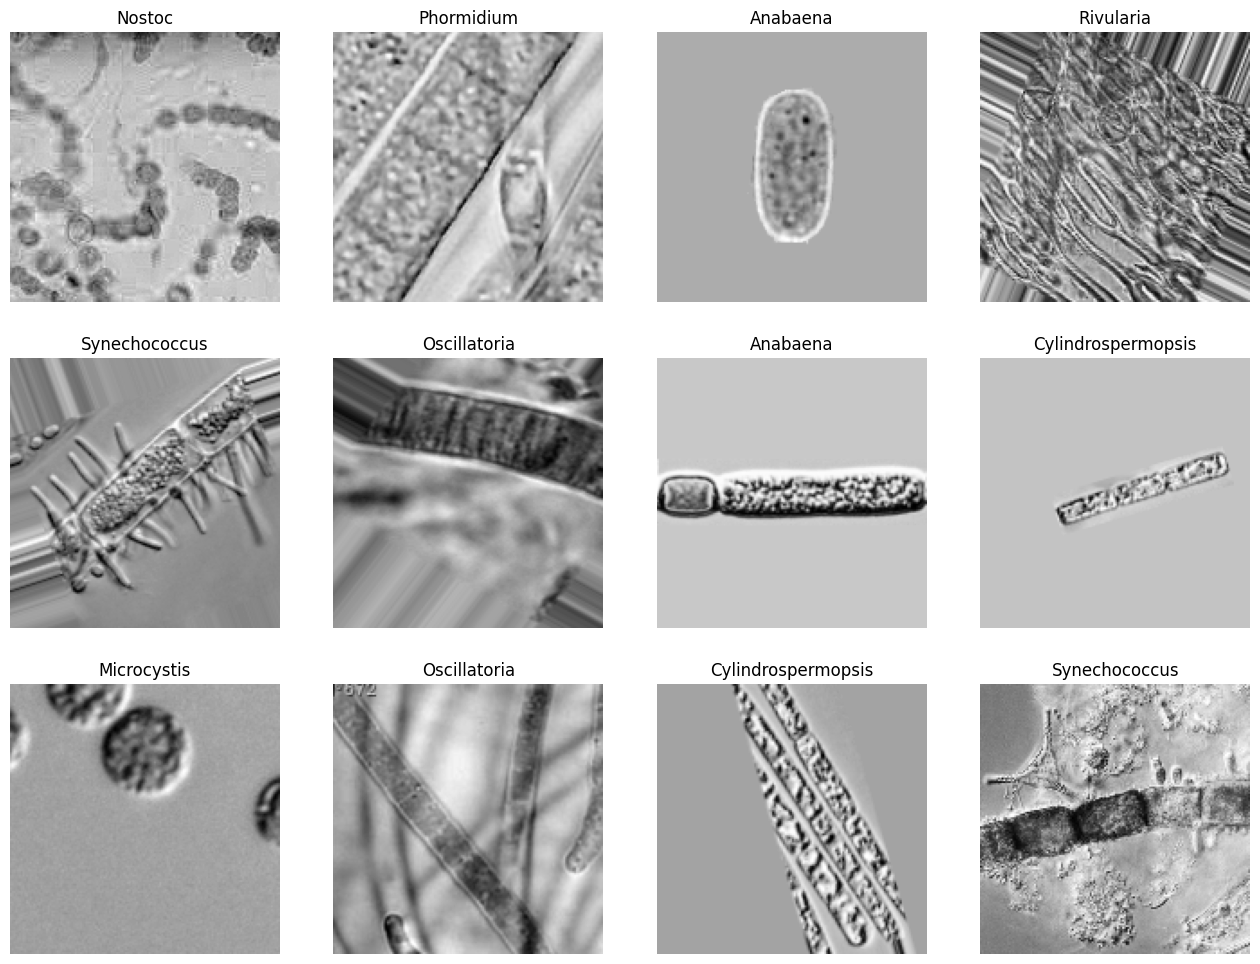

In [21]:
plt.figure(figsize=(16,12))
for n , i in enumerate(list(np.random.randint(0,len(new_X_train),12))) : 
  plt.subplot(3,4,n+1)
  plt.imshow(new_X_train[i],cmap="gray")   
  plt.axis('off')
  plt.title(new_y_train[i])

In [22]:
def Gray3channel(X):
  listt = []
  for i,x in enumerate(X):
    listt.append(cv2.merge([x,x,x]))
  return np.array(listt)

In [23]:
# del X_train
# del y_train

In [24]:
Gray3channel(new_X_train).shape

(3395, 150, 150, 3)

In [25]:
def ReshapeGrey(X):
  return X.reshape((X.shape[0],X.shape[1],X.shape[2],1))

In [26]:
ReshapeGrey(new_X_train).shape

(3395, 150, 150, 1)

In [27]:
encoder = LabelEncoder()
encoder.fit(new_y_train)
encoded_labels_train = encoder.transform(new_y_train)
encoded_labels_test = encoder.transform(y_test)
encoded_labels_val = encoder.transform(y_val)

OneHot_labels_train = to_categorical(encoded_labels_train,num_classes=len(Categories))
OneHot_labels_test = to_categorical(encoded_labels_test,num_classes=len(Categories))
OneHot_labels_val = to_categorical(encoded_labels_val,num_classes=len(Categories))

In [28]:
len(encoded_labels_val)

48

In [29]:
OneHot_labels_train.shape

(3395, 13)

------------------

In [30]:
def labelwithoutput(output):
  listt = []
  for o in output:
    listt.append(np.argmax(o))
  return np.array(listt)

# **Method - EfficientnetB0**

### balancing the weight for each class


In [31]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train contains your training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(new_y_train),
    y=new_y_train
)

# Convert to a dictionary format expected by Keras
class_weights_dict = dict(enumerate(class_weights))


In [32]:
class_weights_dict

{0: 0.9967704051673517,
 1: 1.2864721485411141,
 2: 1.0201322115384615,
 3: 1.2555473372781065,
 4: 1.0446153846153847,
 5: 0.6159288824383164,
 6: 1.1454116059379218,
 7: 0.8424317617866005,
 8: 1.187062937062937,
 9: 0.8534439416792358,
 10: 1.3601762820512822,
 11: 1.0530397022332507,
 12: 0.906784188034188}

## Model

In [33]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Lambda
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2

# # Load the EfficientNetB0 model with pretrained ImageNet weights
# base_model = EfficientNetB0(weights='/kaggle/input/weight-efficient-net/efficientnetb0_notop.h5', include_top=False, input_shape=(150, 150, 3))
# # for layer in base_model.layers[:-10]:  # Unfreeze more layers
# #     layer.trainable = False
# # Add custom layers on top
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)  
# x = Dense(128, activation='relu',kernel_regularizer=l2(0.2))(x)

# x = Dense(64, activation='relu',kernel_regularizer=l2(0.1))(x)

# output = Dense(13, activation='softmax')(x)  # 10 classes

# efficientnetmodel = Model(inputs=base_model.input, outputs=output)



In [34]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load the EfficientNetB0 model with pretrained ImageNet weights
base_model = EfficientNetB0(weights='/kaggle/input/weight-efficient-net/efficientnetb0_notop.h5', include_top=False, input_shape=(150, 150, 3))
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu',kernel_regularizer=l2(0.2))(x)
x = Dense(64, activation='relu',kernel_regularizer=l2(0.1))(x)

output = Dense(13, activation='softmax')(x)  # 10 classes

efficientnetmodel = Model(inputs=base_model.input, outputs=output)

In [35]:
# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2

# # Load the MobileNet model with pre-trained weights, excluding the top layers
# mobilenet_model = MobileNet(
#     input_shape=(150, 150, 3),
#     include_top=False,
#     weights='/kaggle/input/weights-imgnet/mobilenet_1_0_224_tf_no_top (1).h5'
# )

# # Freeze all layers except the last 50 layers
# for layer in mobilenet_model.layers[:-50]:
#     layer.trainable = False

# # Add Global Average Pooling
# mobilenet_output = GlobalAveragePooling2D()(mobilenet_model.output)

# # Add Batch Normalization after Global Average Pooling
# mobilenet_output = BatchNormalization()(mobilenet_output)

# # Add Dense layers with L2 regularization and Dropout for regularization
# mobilenet_output = Dense(64, activation='relu', kernel_regularizer=l2(0.02))(mobilenet_output)
# mobilenet_output = Dropout(0.5)(mobilenet_output)  # Adding Dropout for Regularization

# mobilenet_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(mobilenet_output)
# # mobilenet_output = Dropout(0.5)(mobilenet_output)  # Adding Dropout for Regularization

# # Output layer
# mobilenet_output = Dense(13, activation='softmax')(mobilenet_output)

# # Create and compile the model
# mobilenetmodel = Model(inputs=[mobilenet_model.input], outputs=mobilenet_output)

# # Summary of the model
# # mobilenetmodel.summary()


In [36]:
def scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))
#         return float(lr)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [37]:
len(Gray3channel(X_val))

48

In [38]:
import os
weights_directory = "weights"
filepath = os.path.join(weights_directory, "final3.keras")

# Create the directory if it doesn't exist
if not os.path.exists(weights_directory):
    os.makedirs(weights_directory)
    print(f"Directory '{weights_directory}' created.")
else:
    print(f"Directory '{weights_directory}' already exists.")


Directory 'weights' created.


In [39]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)



checkpoint = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                save_best_only=True, 
                                verbose = 1)

efficientnetmodel.compile(optimizer = opt,
                       loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                       metrics = ['accuracy'])


--------------

In [40]:
history = efficientnetmodel.fit(Gray3channel(new_X_train),
                             OneHot_labels_train,
                             validation_data = (Gray3channel(X_val), OneHot_labels_val),
                             batch_size = 32,
                             class_weight=class_weights_dict,
                             epochs = 40,callbacks=[callback,checkpoint],
                             verbose = 1)

Epoch 1/40
  1/107 ━━━━━━━━━━━━━━━━━━━━ 2:34:41 88s/step - accuracy: 0.1250 - loss: 33.1748

I0000 00:00:1725258412.395054     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.4238 - loss: 17.0011
Epoch 1: val_loss improved from inf to 4.45904, saving model to weights/final3.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 153s 617ms/step - accuracy: 0.4251 - loss: 16.9319 - val_accuracy: 0.0833 - val_loss: 4.4590 - learning_rate: 0.0010
Epoch 2/40
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7432 - loss: 2.4470
Epoch 2: val_loss improved from 4.45904 to 3.09742, saving model to weights/final3.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.7434 - loss: 2.4412 - val_accuracy: 0.0417 - val_loss: 3.0974 - learning_rate: 0.0010
Epoch 3/40
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8069 - loss: 1.5520
Epoch 3: val_loss improved from 3.09742 to 2.87817, saving model to weights/final3.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8070 - loss: 1.5508 - val_accuracy: 0.0417 - val_loss: 2.8782 - learning_rate: 0.0010
Epoch 4/40
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - 

#### Load Fine-tuned EffcientNet

In [61]:
efficientnetmodel.load_weights('/kaggle/input/wight-94-79/final.keras')

------------

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9175 - loss: 0.9346
Test Loss: 0.8443853259086609
Test Accuracy : 0.9445378184318542
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
                    precision    recall  f1-score   support

          Anabaena     0.9057    0.8571    0.8807        56
     Aphanizomenon     0.7500    0.7500    0.7500         4
     Chroococcales     0.9375    0.9091    0.9231        33
Cylindrospermopsis     0.6667    0.6667    0.6667         3
    Dolichospermum     0.8205    0.9697    0.8889        33
       Microcystis     0.9913    0.9745    0.9828       235
            Nostoc     0.9863    0.9863    0.9863        73
      Oscillatoria     0.8611    0.9688    0.9118        32
        Phormidium     0.9818    0.8852    0.9310        61
      Planktothrix     0.8571    0.9474    0.9000        19
      Raphidiopsis     1.0000    0.7500    0.8571         4
         Rivularia     1.0000    0.9412    0.9697        17
     Synechococcus     0.8276    0.9600 

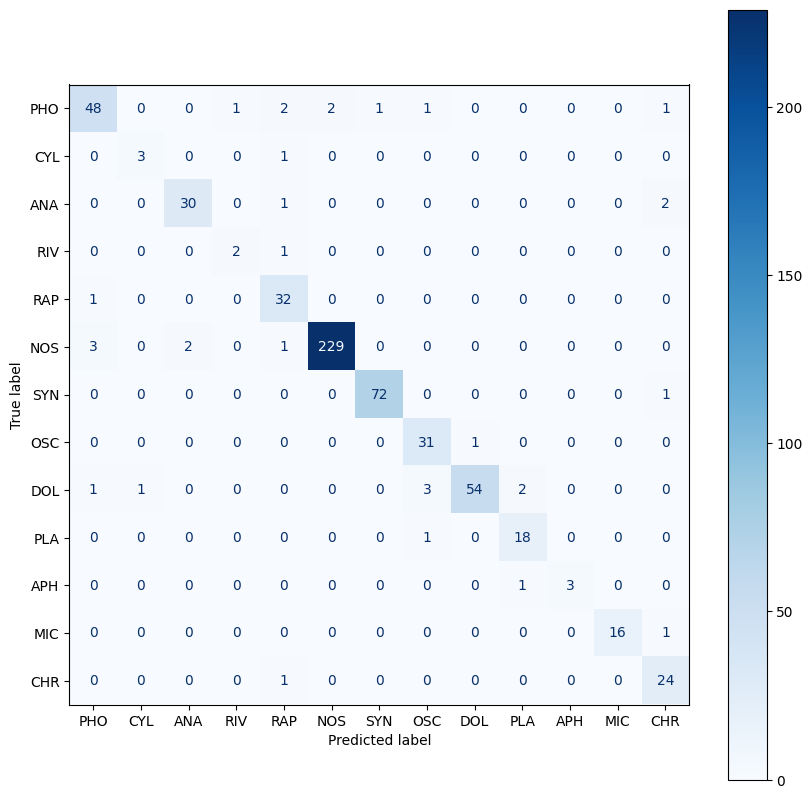

In [62]:
import warnings
warnings.filterwarnings("ignore")
test_Loss, test_Acc = efficientnetmodel.evaluate(Gray3channel(X_test),OneHot_labels_test)
print('Test Loss:', test_Loss)
print('Test Accuracy :', test_Acc)
Y_pred = efficientnetmodel.predict(Gray3channel(X_test))
Y_pred = encoder.inverse_transform(labelwithoutput(Y_pred))
print(classification_report(y_test, Y_pred,digits=4))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred),display_labels=[cl[:3].upper() for cl in Categories])
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax,cmap='Blues')
plt.savefig("/kaggle/working/EfficientNet-Confusion_old.jpg")
plt.show()

In [ ]:
# import shutil

# # Define the output directory and zip file name
# output_directory = '/kaggle/working/weights'
# zip_filename = '/kaggle/working/weights2.zip'

# # Compress the directory into a zip file
# shutil.make_archive(output_directory, 'zip', output_directory)


In [42]:
# Add data
import plotly.graph_objects as go
epochs = [f'{str(i)}' for i in range(1,41)]
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=epochs, y=train_accuracy, name='Train Accuracy',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, name = 'Val Loss',
                         line=dict(color='royalblue', width=4 , dash='dash')))
fig.add_trace(go.Scatter(x=epochs, y=train_loss, name='Train Loss',
                         line=dict(color='firebrick', width=4,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, name='Val Accuracy',
                         line = dict(color='royalblue', width=4)))

# Edit the layout
fig.update_layout(title='Epoch/Loss plot',
                   xaxis_title='Epochs',
                   yaxis_title='Loss / Accuracy (%)')

fig.show()

In [43]:
new_layer = Flatten()(efficientnetmodel.layers[-4].output)
intermediate_layer_model = Model(inputs=efficientnetmodel.input,
                                       outputs=new_layer)
intermediate_output_train = intermediate_layer_model.predict(Gray3channel(new_X_train))
intermediate_output_test = intermediate_layer_model.predict(Gray3channel(X_test))

107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(intermediate_output_train)
X_new = pca.transform(intermediate_output_train)
X_test_new = pca.transform(intermediate_output_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9378151260504202
                    precision    recall  f1-score   support

          Anabaena     0.9216    0.8393    0.8785        56
     Aphanizomenon     0.2500    0.5000    0.3333         4
     Chroococcales     0.9412    0.9697    0.9552        33
Cylindrospermopsis     0.6667    0.6667    0.6667         3
    Dolichospermum     0.8378    0.9394    0.8857        33
       Microcystis     0.9915    0.9872    0.9893       235
            Nostoc     0.9861    0.9726    0.9793        73
      Oscillatoria     0.9000    0.8438    0.8710        32
        Phormidium     0.9298    0.8689    0.8983        61
      Planktothrix     0.9500    1.0000    0.9744        19
      Raphidiopsis     1.0000    1.0000    1.0000         4
         Rivularia     0.7619    0.9412    0.8421        17
     Synechococcus     0.9167    0.8800    0.8980        25

          accuracy                         0.9378       595
         macro avg     0.8502    0.8776    0.8594       595
      weighted avg 

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
new_y_train_encoded = label_encoder.fit_transform(new_y_train)

# Transform the test labels
y_test_encoded = label_encoder.transform(y_test)

# Now new_y_train_encoded and y_test_encoded contain numerical values


In [60]:
import xgboost as xgb

# Initialize the classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_new, new_y_train_encoded)

# Predict on the test data
Y_pred_encoded = xgb_model.predict(X_test_new)

# Decode the predictions back to original class names
Y_pred = label_encoder.inverse_transform(Y_pred_encoded)

# Evaluate the model
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred, digits=4))


0.9260504201680673
                    precision    recall  f1-score   support

          Anabaena     0.9184    0.8036    0.8571        56
     Aphanizomenon     0.3333    0.7500    0.4615         4
     Chroococcales     0.9412    0.9697    0.9552        33
Cylindrospermopsis     0.3333    0.3333    0.3333         3
    Dolichospermum     0.8333    0.9091    0.8696        33
       Microcystis     0.9873    0.9915    0.9894       235
            Nostoc     0.9583    0.9452    0.9517        73
      Oscillatoria     0.8966    0.8125    0.8525        32
        Phormidium     0.9107    0.8361    0.8718        61
      Planktothrix     0.9500    1.0000    0.9744        19
      Raphidiopsis     0.8000    1.0000    0.8889         4
         Rivularia     0.7619    0.9412    0.8421        17
     Synechococcus     0.8800    0.8800    0.8800        25

          accuracy                         0.9261       595
         macro avg     0.8080    0.8594    0.8252       595
      weighted avg 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, new_y_train)
Y_pred = neigh.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9378151260504202
                    precision    recall  f1-score   support

          Anabaena     0.9231    0.8571    0.8889        56
     Aphanizomenon     0.2500    0.5000    0.3333         4
     Chroococcales     0.9412    0.9697    0.9552        33
Cylindrospermopsis     0.6667    0.6667    0.6667         3
    Dolichospermum     0.8611    0.9394    0.8986        33
       Microcystis     0.9915    0.9872    0.9893       235
            Nostoc     0.9726    0.9726    0.9726        73
      Oscillatoria     0.8966    0.8125    0.8525        32
        Phormidium     0.9298    0.8689    0.8983        61
      Planktothrix     0.9500    1.0000    0.9744        19
      Raphidiopsis     1.0000    1.0000    1.0000         4
         Rivularia     0.7619    0.9412    0.8421        17
     Synechococcus     0.9167    0.8800    0.8980        25

          accuracy                         0.9378       595
         macro avg     0.8508    0.8766    0.8592       595
      weighted avg 

In [48]:
from sklearn.svm import SVC

# Initialize the classifier with RBF kernel
svm = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model
svm.fit(X_new, new_y_train)

# Predict on the test data
Y_pred = svm.predict(X_test_new)

# Evaluate the model
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred, digits=4))


0.9378151260504202
                    precision    recall  f1-score   support

          Anabaena     0.9231    0.8571    0.8889        56
     Aphanizomenon     0.2500    0.5000    0.3333         4
     Chroococcales     0.9412    0.9697    0.9552        33
Cylindrospermopsis     0.6667    0.6667    0.6667         3
    Dolichospermum     0.8611    0.9394    0.8986        33
       Microcystis     0.9915    0.9872    0.9893       235
            Nostoc     0.9726    0.9726    0.9726        73
      Oscillatoria     0.8966    0.8125    0.8525        32
        Phormidium     0.9298    0.8689    0.8983        61
      Planktothrix     0.9500    1.0000    0.9744        19
      Raphidiopsis     1.0000    1.0000    1.0000         4
         Rivularia     0.7619    0.9412    0.8421        17
     Synechococcus     0.9167    0.8800    0.8980        25

          accuracy                         0.9378       595
         macro avg     0.8508    0.8766    0.8592       595
      weighted avg 

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_new, new_y_train)

# Predict on the test data
Y_pred = gb.predict(X_test_new)

# Evaluate the model
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred, digits=4))


0.9042016806722689
                    precision    recall  f1-score   support

          Anabaena     0.8980    0.7857    0.8381        56
     Aphanizomenon     0.3750    0.7500    0.5000         4
     Chroococcales     0.9688    0.9394    0.9538        33
Cylindrospermopsis     0.5000    0.3333    0.4000         3
    Dolichospermum     0.8056    0.8788    0.8406        33
       Microcystis     0.9547    0.9872    0.9707       235
            Nostoc     0.9067    0.9315    0.9189        73
      Oscillatoria     0.8667    0.8125    0.8387        32
        Phormidium     0.8824    0.7377    0.8036        61
      Planktothrix     0.9048    1.0000    0.9500        19
      Raphidiopsis     1.0000    1.0000    1.0000         4
         Rivularia     0.7895    0.8824    0.8333        17
     Synechococcus     0.8400    0.8400    0.8400        25

          accuracy                         0.9042       595
         macro avg     0.8225    0.8368    0.8221       595
      weighted avg 

In [55]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier
nb = GaussianNB()

# Train the model
nb.fit(X_new, new_y_train)

# Predict on the test data
Y_pred = nb.predict(X_test_new)

# Evaluate the model
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred, digits=4))


0.9428571428571428
                    precision    recall  f1-score   support

          Anabaena     0.8772    0.8929    0.8850        56
     Aphanizomenon     0.3333    0.5000    0.4000         4
     Chroococcales     0.9697    0.9697    0.9697        33
Cylindrospermopsis     0.5000    0.6667    0.5714         3
    Dolichospermum     0.8889    0.9697    0.9275        33
       Microcystis     1.0000    0.9830    0.9914       235
            Nostoc     0.9863    0.9863    0.9863        73
      Oscillatoria     0.9000    0.8438    0.8710        32
        Phormidium     0.9286    0.8525    0.8889        61
      Planktothrix     0.9500    1.0000    0.9744        19
      Raphidiopsis     1.0000    1.0000    1.0000         4
         Rivularia     0.7619    0.9412    0.8421        17
     Synechococcus     0.9167    0.8800    0.8980        25

          accuracy                         0.9429       595
         macro avg     0.8471    0.8835    0.8620       595
      weighted avg 